In [1]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests # получение данных по ссылке
import pandas as pd

In [2]:
html = requests.get('https://genshin-info.ru/wiki/personazhi/').text
soup = BeautifulSoup(html, 'html')

In [79]:
hero = soup.find_all('div', {'class':'itemcard__name'})
heroes = []
for elem in hero:
  if len(elem.text) == 1 :
    heroes.append('Главный герой')
  else:
    heroes.append(elem.text)
print(len(heroes))

80


In [80]:
url = soup.find_all('div', {'class':'itemcard__img'})
urls = []
for elem in url:
  urls.append('https://genshin-info.ru/' + elem.img['data-src'])
print(len(urls))

80


In [ ]:
predata = []
for hero, url in zip(heroes, urls):
  predata.append([hero, url])
predata.pop()

In [140]:
my_data = pd.DataFrame(data=predata, columns = ['hero', 'url'])

In [141]:
my_data['name'] = 'Геншин Импакт'
my_data['poster'] = 'https://genshin-info.ru/local/templates/wi_genshin/images/bg_xs.webp'
my_data['group'] = 'Игры'

In [142]:
my_data = my_data.drop_duplicates()

In [143]:
my_data['index_character'] = [i + 1 for i in range(len(my_data))]

In [144]:
data = pd.read_csv('https://raw.githubusercontent.com/yupest/guess_who/main/data/data.csv', index_col=0)

In [145]:
start_index = data['index'].max() + 1
start_index_world = data['index_world'].max() + 1

In [146]:
my_data['index'] = [start_index + i for i in range(len(my_data))]
my_data['index_world'] = [start_index_world for i in range(len(my_data))]

In [148]:
my_data.head()

,hero,url,name,poster,group,index_character,index,index_world
0,Фурина,https://genshin-info.ru//upload/resize_cache/i...,Геншин Импакт,https://genshin-info.ru/local/templates/wi_gen...,Игры,1,1617,24
1,Шарлотта,https://genshin-info.ru//upload/resize_cache/i...,Геншин Импакт,https://genshin-info.ru/local/templates/wi_gen...,Игры,2,1618,24
2,Ризли,https://genshin-info.ru//upload/resize_cache/i...,Геншин Импакт,https://genshin-info.ru/local/templates/wi_gen...,Игры,3,1619,24
3,Нёвиллет,https://genshin-info.ru//upload/resize_cache/i...,Геншин Импакт,https://genshin-info.ru/local/templates/wi_gen...,Игры,4,1620,24
4,Лини,https://genshin-info.ru//upload/resize_cache/i...,Геншин Импакт,https://genshin-info.ru/local/templates/wi_gen...,Игры,5,1621,24


In [149]:
data = pd.concat([data, my_data])

In [156]:
data.head()

,index,index_character,index_world,name,poster,hero,url,group,Unnamed: 8,url_info,description
0,1,1,0,Создать,https://github.com/yupest/guess_who/blob/main/...,NaN,https://forms.gle/ezzDeRL6WM3gbXTr7,Все,NaN,NaN,NaN
1,2,1,0,Оценить,https://github.com/yupest/guess_who/blob/main/...,NaN,https://forms.gle/kx9hjRVi6KT9TyFg7,Все,NaN,NaN,NaN
2,1616,1,0,Помочь проекту,https://github.com/yupest/guess_who/blob/main/...,NaN,payment.html,Все,NaN,NaN,NaN
3,3,1,1,Наруто,https://c.wallhere.com/photos/d4/f4/Naruto_Shi...,Наруто,http://pm1.narvii.com/6922/d7d029f10750725a220...,Аниме,NaN,NaN,NaN
4,4,2,1,Наруто,https://c.wallhere.com/photos/d4/f4/Naruto_Shi...,Хината,https://wallup.net/wp-content/uploads/2019/09/...,Аниме,NaN,NaN,NaN


In [154]:
data.to_excel('data.xlsx', index = False)

In [155]:
from google.colab import files

files.download('data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [168]:
data = data.drop([0, 1, 2])

<Axes: xlabel='name'>

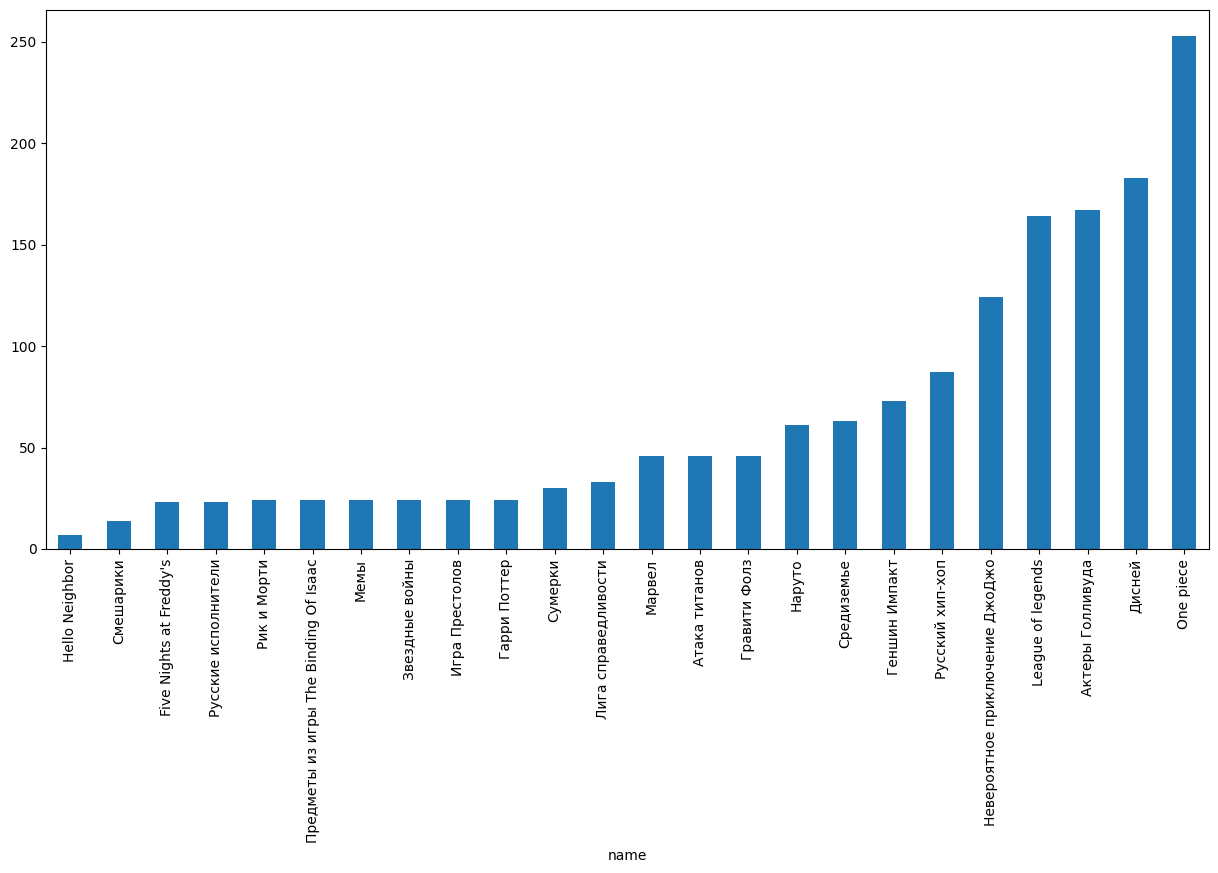

In [234]:
data.groupby(['name']).size().sort_values().plot(kind='bar',figsize=(15,7))

In [182]:
data['domen'] = data.url.apply(lambda s: '/'.join(s.split('/')[0:3]))

<Axes: xlabel='domen'>

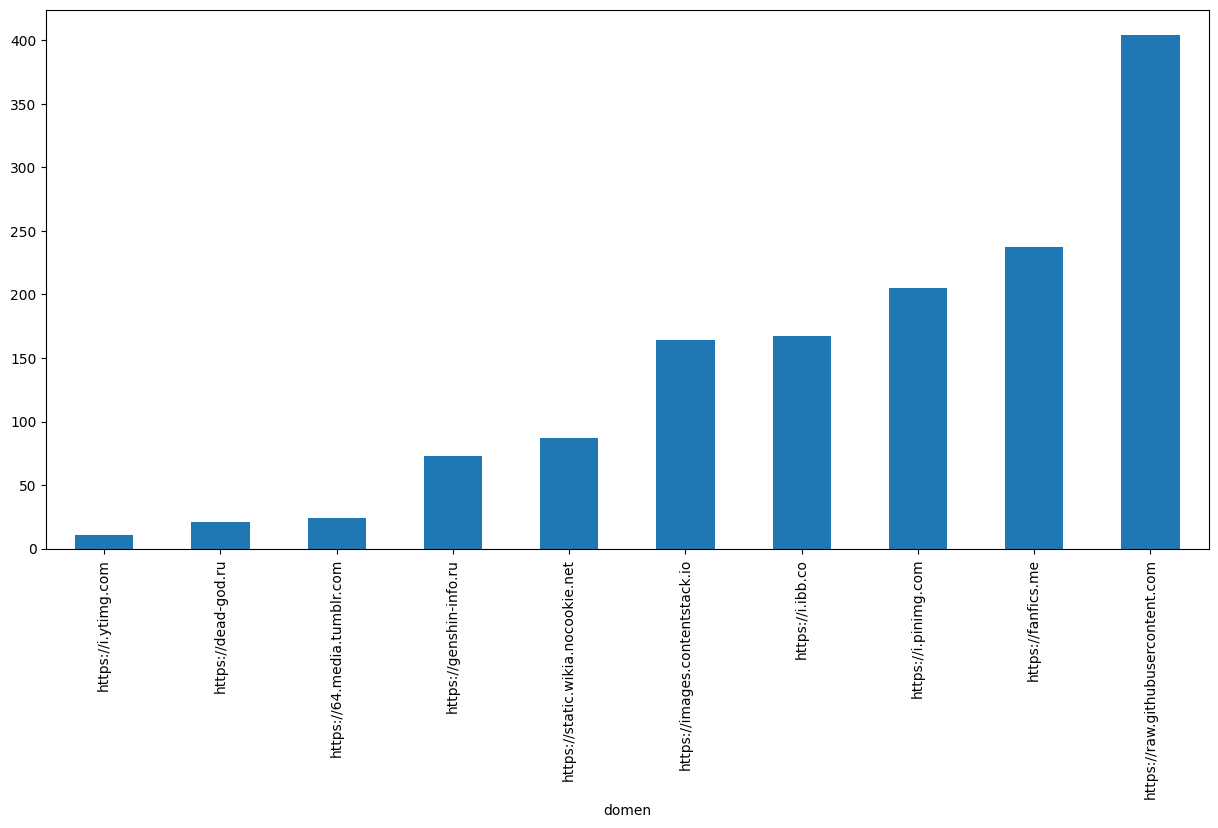

In [185]:
data.groupby(['domen']).size().sort_values().tail(10).plot(kind='bar',figsize=(15,7))

In [271]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [272]:
worlds = widgets.Dropdown(
    options=[('Мир', 'name'), ('Группа','group')],
    description='Мир:',
    disabled=False,
)
output = widgets.Output()

display(worlds, output)

def on_value_change(change):
  with output:
    output.clear_output()
    cat = change['new']
    xy = data.groupby([cat]).size().sort_values().tail(10)
    plt.bar(xy.index.tolist(), xy.values.tolist())
    plt.xticks(rotation=90)
    plt.show()

worlds.observe(on_value_change, names='value')

Dropdown(description='Мир:', options=(('Мир', 'name'), ('Группа', 'group')), value='name')

Output()